<a href="https://colab.research.google.com/github/joeyMckinney/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
def find_mean_var_sd(a_list):
  list_a = np.array(a_list)
  mean = np.mean(list_a)
  n = len(a_list)
  variance = (((list_a - mean)**2).sum()) / (n-1)
  sd = np.sqrt(variance)

  return pd.DataFrame({'mean:' : [mean], 'variance:': [variance], 'standard deviation:': [sd]}) 


In [63]:
find_mean_var_sd(sales)

,mean:,variance:,standard deviation:
0,3052.714286,214387.904762,463.020415


In [64]:
print(np.mean(sales))
print(np.var(sales, ddof=1))
print(np.std(sales, ddof=1))

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [65]:
customers = np.array([127, 80, 105, 92, 120, 115, 93])
def find_covariance(a_list, b_list):
  a_mean = np.mean(a_list)
  b_mean = np.mean(b_list)

  deviation1 = a_list - a_mean
  deviation2 = b_list - b_mean

  numerator = (deviation1*deviation2).sum()
  covariance = numerator / (len(a_list) - 1)
  return covariance

In [66]:
find_covariance(sales, customers)

7604.357142857142

In [67]:
df1 = pd.DataFrame({'sales': sales,
                    'last_week': customers})
df1

,sales,last_week
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [68]:
df1.cov()

,sales,last_week
sales,214387.904762,7604.357143
last_week,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [70]:
customers_results = find_mean_var_sd(customers)
customers_results['standard deviation:']

0    17.057326
Name: standard deviation:, dtype: float64

In [71]:
sales_results = find_mean_var_sd(sales)
sales_results

,mean:,variance:,standard deviation:
0,3052.714286,214387.904762,463.020415


In [72]:
def find_correlation(var1, var2):
  cov = find_covariance(var1, var2)
  correlation = cov / (customers_results['standard deviation:']*sales_results['standard deviation:'])
  return correlation

In [73]:
find_correlation(sales, customers)

0    0.962834
Name: standard deviation:, dtype: float64

In [74]:
df1.corr()

,sales,last_week
sales,1.000000,0.962834
last_week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [75]:
df2 = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df2.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [78]:
df2.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [79]:
df2.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

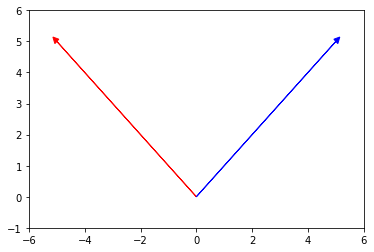

In [92]:
v1 = [-5, 5]
v2 = [5, 5]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-6,6)          
plt.ylim(-1,6)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [93]:
a_vector = [-5, 3, 7]
b_vector = [6, -8, 2]

np.vdot(a_vector, b_vector)


-40

they are not orthogonal beccause the dot product is not zero

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [195]:
#i dont know why this isn't working
((2**2 + -15**2 + 6**2 + 20**2)**2)**(1/2)

215.0

In [197]:
np.linalg.norm(c)**2

665.0

In [145]:
c = [2, -15, 6, 20]
np.vdot(c, c)

665

In [128]:
c_df = pd.DataFrame({"c": c})
c_df

,c
0,2
1,-15
2,6
3,20


In [131]:
ct = c_df.T
ct

,0,1,2,3
c,2,-15,6,20


In [146]:
c_df2 = ct * c
c_df2

,0,1,2,3
c,4,225,36,400


thye all add up to 665 which is the dot product

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

 d:
 \begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89244
\end{align}


\begin{align}
\hat{d} = \frac{1}{||d||}d = \frac{1}{13.89}\begin{bmatrix} 7 \\ 12\end{bmatrix} = \begin{bmatrix} \frac{7}{13.89} \\ \frac{12}{13.89}\end{bmatrix} = \begin{bmatrix} {0.5038} \\ {0.8637}\end{bmatrix}
\end{align}



e:
 \begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 -64} = \sqrt{61} = 7.8102
\end{align}


\begin{align}
\hat{e} = \frac{1}{||e||}e = \frac{1}{7.81}\begin{bmatrix} 2 \\ 11 \\  -8 \end{bmatrix} = \begin{bmatrix} \frac{2}{7.81} \\ \frac{11}{7.81} \\  \frac{-8}{7.81} \end{bmatrix} = \begin{bmatrix} {0.25607} \\ {1.4084} \\  {-1.0242} \end{bmatrix}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [158]:
f = np.array([[4, 12, 11, 9, 2]])
f

array([[ 4, 12, 11,  9,  2]])

In [161]:
norm_f = np.linalg.norm(f)

In [163]:
unit_vector_f = np.array([[4/norm_f],
                          [12/norm_f],
                          [11/norm_f],
                          [9/norm_f],
                          [2/norm_f]])
unit_vector_f

array([[0.20908335],
       [0.62725005],
       [0.57497921],
       [0.47043754],
       [0.10454167]])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

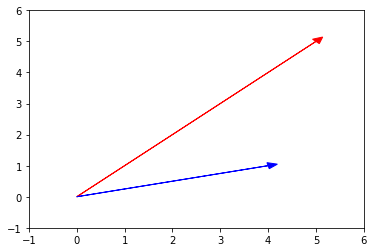

In [185]:
#linear independent
v1 = [5, 5]
v2 = [4, 1]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.show()

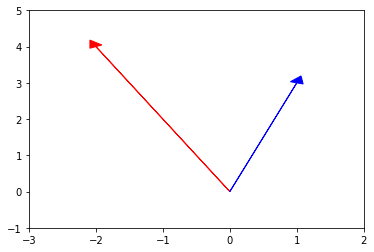

In [176]:
#linear independent
v1 = [-2, 4]
v2 = [1, 3]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-3,2)          
plt.ylim(-1,5)
plt.show()

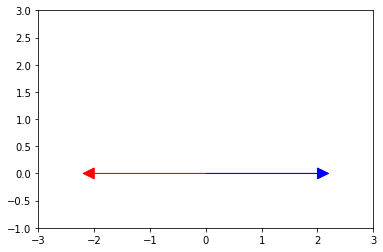

In [170]:
#linear dependent
v1 = [-2, 0]
v2 = [2, 0]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-3,3)          
plt.ylim(-1,3)
plt.show()

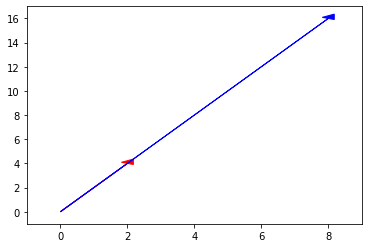

In [171]:
#linear dependent
v1 = [2, 4]
v2 = [8, 16]

plt.arrow(0,0, v1[0], v1[1],head_width=.4, head_length=0.4, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.4, head_length=0.4, color ='blue')
plt.xlim(-1,9)          
plt.ylim(-1,17)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

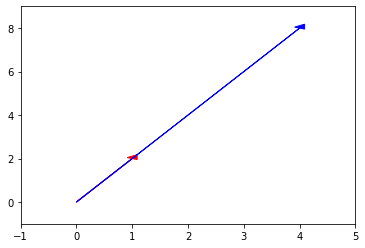

In [150]:
v1 = [1, 2]
v2 = [4, 8]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-1,5)          
plt.ylim(-1,9)
plt.show()

because these two vectors share the same line the span is any other vector that overlaps this line. they are linearly dependent. so the span and 1d space

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [151]:
from mpl_toolkits.mplot3d import Axes3D

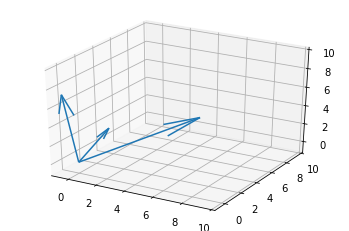

In [157]:
vector = np.array([[0, 0, 0, 1, 2, 3],
                   [0, 0, 0, -1, 0, 7],
                   [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vector)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 10])
plt.show()

these vectors are linearly independent. because they do not fall on the same line. also these vectors are not on the same line the span is 3d space

In [203]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8 ,2]])
from scipy.linalg import lu

pl, p_rank = lu(P, permute_l=True)
print(p_rank)

[[4.  8.  2. ]
 [0.  2.  7.5]
 [0.  0.  2.5]]


also its rank R^3 so its span is 3d space

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



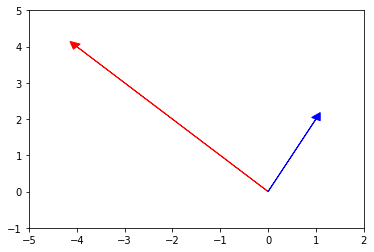

In [188]:
#basis for R**2
v1 = [-4, 4]
v2 = [1, 2]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-5,2)          
plt.ylim(-1,5)
plt.show()

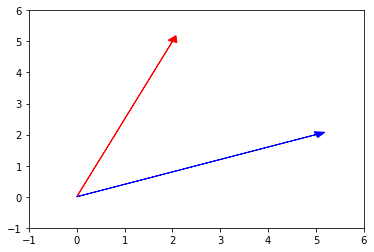

In [192]:
#basis for R**2
v1 = [2, 5]
v2 = [5, 2]

plt.arrow(0,0, v1[0], v1[1],head_width=.2, head_length=0.2, color ='red')
plt.arrow(0,0, v2[0], v2[1],head_width=.2, head_length=0.2, color ='blue')
plt.xlim(-1,6)          
plt.ylim(-1,6)
plt.show()

## 6.2 What does it mean to form a basis?

to form a basis is to take a set of vectors that are linearly independent and can span that space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [198]:
P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8 ,2]])

In [202]:
from scipy.linalg import lu

pl, p_rank = lu(P, permute_l=True)
print(p_rank)

[[4.  8.  2. ]
 [0.  2.  7.5]
 [0.  0.  2.5]]


The rank of P is $\mathbb{R}^3$

## 7.2 What does the rank of a matrix tell us?

it tells us the span and what dimensional space it is in. 2d or 3d or 4d and so on. also it tells us how man linearly indeopendent vectors their are.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

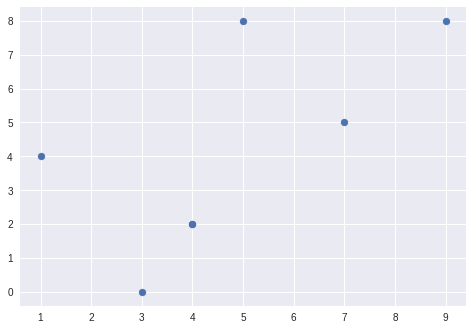

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()